# Exploratory Data Analysis

This document is dedicated for the exploratory part of the project. We are looking for features that might correlate with the data. So that the machine learning algorithm may learn from the most important data.

In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
import helper
import seaborn as sns


%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

![Data Categorization](./pictures/data_categorization.png)


The picture above illustrates how the data is categorized.


 These are the column categories of TRAIN_A:  ['time' 'pv_measurement']

 These are the column categories of X_TRAIN_ESTIMATED_A:  ['date_calc' 'date_forecast' 'absolute_humidity_2m:gm3'
 'air_density_2m:kgm3' 'ceiling_height_agl:m' 'clear_sky_energy_1h:J'
 'clear_sky_rad:W']
The total length is:  47

 These are the column categories of X_TRAIN_OBSERVED_A:  ['date_forecast' 'absolute_humidity_2m:gm3' 'air_density_2m:kgm3'
 'ceiling_height_agl:m' 'clear_sky_energy_1h:J' 'clear_sky_rad:W'
 'cloud_base_agl:m']
The total length is:  46

 These are the column categories of X_TEST_ESTIMATED_A:  ['date_calc' 'date_forecast' 'absolute_humidity_2m:gm3'
 'air_density_2m:kgm3' 'ceiling_height_agl:m' 'clear_sky_energy_1h:J'
 'clear_sky_rad:W']
The total length is:  47

 The differences between X_TRAIN_OBSERVED_A and X_TRAIN_ESTIMATED_A: []

 The differences between X_TRAIN_OBSERVED_A and X_TEST_ESTIMATED_A: ['date_calc']

 The differences between X_TEST_ESTIMATED_A and X_TRAIN_ESTIMATED_A: []
The

'\nSome thoughts unrelated to the rest.\n    1. Where are we missing data?\n    2. Plot the data for different months?\n    3. How do we catch any unlinear correlations?\n    4. \n'

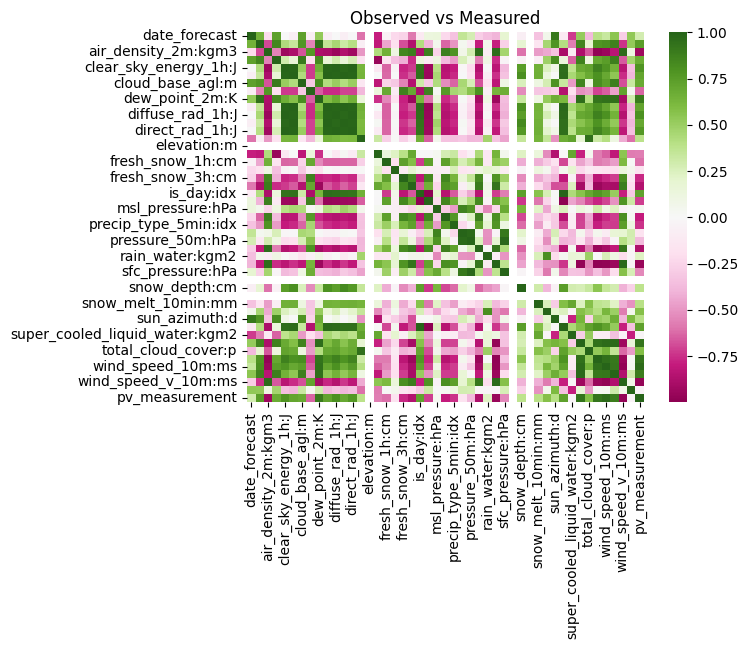

In [32]:
train_a = pd.read_parquet('A/train_targets.parquet')
print("\n These are the column categories of TRAIN_A: ", train_a.columns.values)

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
print("\n These are the column categories of X_TRAIN_ESTIMATED_A: ", X_train_estimated_a.columns.values[0:7])
print("The total length is: ", len(X_train_estimated_a.columns.values))

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
print("\n These are the column categories of X_TRAIN_OBSERVED_A: ", X_train_observed_a.columns.values[0:7])
print("The total length is: ", len(X_train_observed_a.columns.values))

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
print("\n These are the column categories of X_TEST_ESTIMATED_A: ", X_test_estimated_a.columns.values[0:7])
print("The total length is: ", len(X_test_estimated_a.columns.values))


"""
Looking for differences between the categories of each set.
"""

dif = list(set(X_train_observed_a.columns.values) - set(X_train_estimated_a.columns.values))
print("\n The differences between X_TRAIN_OBSERVED_A and X_TRAIN_ESTIMATED_A:", dif)

dif = list(set(X_test_estimated_a.columns.values) - set(X_train_observed_a.columns.values))
print("\n The differences between X_TRAIN_OBSERVED_A and X_TEST_ESTIMATED_A:", dif)

dif = list(set(X_train_estimated_a.columns.values) - set(X_test_estimated_a.columns.values))
print("\n The differences between X_TEST_ESTIMATED_A and X_TRAIN_ESTIMATED_A:", dif)

"""
Looking for differences between the categories of each set.
"""

"""
This is intended to be a function that has the capabilities to see gaps!
"""

# Y_dates = train_a["time"]
# print(Y_dates)

# dates = pd.concat([X_train_observed_a["date_forecast"], X_train_estimated_a["date_forecast"], X_test_estimated_a["date_forecast"]], axis=0)
# print("This is last element:", X_test_estimated_a["date_forecast"].iloc[-1])

# datetime_obj = dates.iloc[0]
# print(datetime_obj)
# missing_dates = helper.find_missing_dates(dates, 0, 15)
# print(missing_dates[-20:-1])

"""
Should especially look at the various ... 
1. Clearly plot missing data.
2. Find gaps in missing data. 
3. Compare the different time data.

"""

first_date_observed = X_train_observed_a["date_forecast"].iloc[0]
last_date_observed = X_train_observed_a["date_forecast"].iloc[-5]
print("The first date is ", first_date_observed)
print("The last date is ", last_date_observed)


first_date_estimated = X_train_estimated_a["date_forecast"].iloc[0]
last_date_estimated = X_train_estimated_a["date_forecast"].iloc[-4]
print("The first date is ", first_date_estimated)
print("The last date is ", last_date_train_estimated)


extracted_0 = train_a.loc[train_a['time'] == first_date_observed]
extracted_1 = train_a.loc[train_a['time'] == last_date_observed]
extracted_2 = train_a.loc[train_a['time'] == first_date_estimated]
extracted_3 = train_a.loc[train_a['time'] == last_date_estimated]

init_index_observed = extracted_0.index.to_list()[0]
last_index_observed = extracted_1.index.to_list()[0]
init_index_estimated = extracted_2.index.to_list()[0]
last_index_estimated = extracted_3.index.to_list()[0]

# We need to extact the corresponding data.
Y_observed = train_a.iloc[init_index_observed:last_index_observed]
Y_estimated = train_a.iloc[init_index_estimated:last_index_estimated]

# Data processing. Getting the mean of the weather forecast.

X_train_observed_a["date_forecast"] = pd.to_datetime(X_train_observed_a["date_forecast"])
dates = X_train_observed_a["date_forecast"]
df = X_train_observed_a.groupby([X_train_observed_a["date_forecast"].dt.hour]).mean()
df["date_forecast"] = Y_observed["time"]

print(df.head())


"""
TODO:
    1. Change the extraction method to specific dates. ie use date time object.
    2. Store the calculated mean data to a file. This is way easier to work with later.
"""

df["pv_measurement"] = Y_observed["pv_measurement"]

observed_df = df

corr_matrix = observed_df.corr()

sns.heatmap(corr_matrix, cmap="PiYG")
plt.title('Observed vs Measured')


"""
TODO:
    1. What are the differences between observed and estimated correlation matrixes? Is one worse than the other?
    2. Add appropriate title and save data to file.
"""

"""
Some thoughts unrelated to the rest.
    1. Where are we missing data?
    2. Plot the data for different months?
    3. How do we catch any unlinear correlations?
    4. Create Jupyter notebooks each with specific purpose and documntation with what they are used for.
"""

## Discovery
There is a difference between the trained data, and this is mainly that "X_trained_observed" has one less category than the 2 other X-values. Why this is remains however unclear.

![Data Categorization](./pictures/model_testing_procedure.png)
The picture above describes the procedure that will be used to test the model.